# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

Three Observable Trends/Insights:
1. The higher the absolute value (the closer to either earth's pole) of latitude, the lower the temperature tends to be.
2. Latitude is likely not an influential factor that affects how cloudy a certain day is at any city.
3. From our sample dataset, the mean wind speed is 8.0 and the median wind speed is 6.7, which is close to one-fourth of the theoretical human maximum running speed which is 28 mph. Any wind's speed higher than 22.0 mph [(3rd Quartile - 1st Quartile) * 1.5 + 3rd Quartile = (10.85-3.44)*1.5 + 10.85 = 21.97 mph] is mostly like an outlier. The maximum wind speed in the selected sample is 38.0 mph. Though a wind with peed around 40 mph is still a lot slower than a typhoon, winds like this likely indicate unusual weather conditions in certain areas.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

653

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save configurations of the url. We want to work with Farenheit so use unit "imperial"
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# Retreive desired information on each city using a series of successive API calls.
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
# Create a new cities list to store only the cities able to be found from the API
cities_found = []

set_counter = 0
record_counter = 0

print('Beginning Data Retrieval')
print('-----------------------------')

for city in cities:
    if record_counter < 50:
        try:
            response = requests.get(query_url + city).json()
            lat.append(response['coord']['lat'])
            lng.append(response['coord']['lon'])
            max_temp.append(response['main']['temp_max'])
            humidity.append(response['main']['humidity'])
            cloudiness.append(response['clouds']['all'])
            wind_speed.append(response['wind']['speed'])
            country.append(response['sys']['country'])
            date.append(response['dt'])
            cities_found.append(response['name'])
            print(f'Processing Record {record_counter + 1} of Set {set_counter + 1} | {city}')
            record_counter += 1
        except:
            print('City not found. Skipping...')
    else:
        record_counter = 0
        set_counter += 1

print('-----------------------------')
print('Data Retrieval Complete') 
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | vaini
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | altzayanca
Processing Record 4 of Set 1 | connersville
Processing Record 5 of Set 1 | pisco
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | nuuk
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | antsohihy
Processing Record 12 of Set 1 | chaoyang
Processing Record 13 of Set 1 | saint-prosper
Processing Record 14 of Set 1 | harnosand
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | saint-georges
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | port-gentil
Processing Record 20 of Set 1 | fairbanks
Processing Record 21 of Set 1 | paragominas
Processing Record 22 of Set 1 | wladyslawowo
Processing Record 23 of Set 1 | l

Processing Record 44 of Set 4 | sorong
Processing Record 45 of Set 4 | saskylakh
City not found. Skipping...
Processing Record 46 of Set 4 | ilhabela
Processing Record 47 of Set 4 | orel-izumrud
Processing Record 48 of Set 4 | tiksi
Processing Record 49 of Set 4 | hobyo
Processing Record 50 of Set 4 | maniitsoq
Processing Record 1 of Set 5 | marawi
Processing Record 2 of Set 5 | kalanguy
Processing Record 3 of Set 5 | nhulunbuy
Processing Record 4 of Set 5 | tasiilaq
Processing Record 5 of Set 5 | coquimbo
City not found. Skipping...
Processing Record 6 of Set 5 | marshall
Processing Record 7 of Set 5 | kalmunai
Processing Record 8 of Set 5 | balikpapan
Processing Record 9 of Set 5 | severomuysk
Processing Record 10 of Set 5 | altamont
Processing Record 11 of Set 5 | presidente epitacio
Processing Record 12 of Set 5 | mocuba
Processing Record 13 of Set 5 | udachnyy
Processing Record 14 of Set 5 | tanabe
Processing Record 15 of Set 5 | bad salzungen
Processing Record 16 of Set 5 | new n

Processing Record 35 of Set 8 | tigil
Processing Record 36 of Set 8 | kabanjahe
Processing Record 37 of Set 8 | pevek
Processing Record 38 of Set 8 | saint-joseph
Processing Record 39 of Set 8 | parrita
Processing Record 40 of Set 8 | marienburg
Processing Record 41 of Set 8 | husavik
Processing Record 42 of Set 8 | chokurdakh
Processing Record 43 of Set 8 | labuhan
Processing Record 44 of Set 8 | matane
Processing Record 45 of Set 8 | hirara
Processing Record 46 of Set 8 | rio gallegos
Processing Record 47 of Set 8 | innisfail
Processing Record 48 of Set 8 | kentau
City not found. Skipping...
Processing Record 49 of Set 8 | sitka
Processing Record 50 of Set 8 | abapo
Processing Record 1 of Set 9 | lucapa
Processing Record 2 of Set 9 | gambela
Processing Record 3 of Set 9 | trat
City not found. Skipping...
Processing Record 4 of Set 9 | kyren
Processing Record 5 of Set 9 | general roca
Processing Record 6 of Set 9 | lichtenfels
Processing Record 7 of Set 9 | kokopo
Processing Record 8 

Processing Record 19 of Set 12 | masalli
Processing Record 20 of Set 12 | chernyshevskiy
Processing Record 21 of Set 12 | capitan bado
Processing Record 22 of Set 12 | dalnerechensk
Processing Record 23 of Set 12 | priiskovyy
Processing Record 24 of Set 12 | tyup
Processing Record 25 of Set 12 | pitimbu
Processing Record 26 of Set 12 | bara
Processing Record 27 of Set 12 | lavrentiya
Processing Record 28 of Set 12 | gien
Processing Record 29 of Set 12 | qaqortoq
Processing Record 30 of Set 12 | pristen
Processing Record 31 of Set 12 | mamlyutka
Processing Record 32 of Set 12 | luau
Processing Record 33 of Set 12 | saint-augustin
Processing Record 34 of Set 12 | sechura
Processing Record 35 of Set 12 | daru
Processing Record 36 of Set 12 | camden
Processing Record 37 of Set 12 | amapa
Processing Record 38 of Set 12 | chany
Processing Record 39 of Set 12 | montrose
Processing Record 40 of Set 12 | svetlyy
-----------------------------
Data Retrieval Complete
-----------------------------

In [13]:
# Provided output, left for reference...

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | yerbogachen
Processing Record 3 of Set 1 | cape town
Processing Record 4 of Set 1 | touba
Processing Record 5 of Set 1 | jamestown
Processing Record 6 of Set 1 | rio grande
Processing Record 7 of Set 1 | ibra
Processing Record 8 of Set 1 | port elizabeth
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | avarua
Processing Record 11 of Set 1 | nemuro
Processing Record 12 of Set 1 | morgan city
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | kawalu
Processing Record 15 of Set 1 | hami
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | hjallerup
Processing Record 19 of Set 1 | punta arenas
Processing Record 20 of Set 1 | bengkulu
Processing Record 21 of Set 1 | victoria
Processing Record 22 of Set 1 | rangapara
Processing Record 23 of Set 1 | hithadho

Processing Record 36 of Set 4 | chimbote
Processing Record 37 of Set 4 | kanor
Processing Record 38 of Set 4 | san pedro de uraba
Processing Record 39 of Set 4 | taphan hin
Processing Record 40 of Set 4 | upernavik
Processing Record 41 of Set 4 | matagami
Processing Record 42 of Set 4 | terme
Processing Record 43 of Set 4 | coria
Processing Record 44 of Set 4 | pallasovka
Processing Record 45 of Set 4 | asyut
Processing Record 46 of Set 4 | cockburn town
Processing Record 47 of Set 4 | osypenko
Processing Record 48 of Set 4 | sioux lookout
Processing Record 49 of Set 4 | gotsu
Processing Record 0 of Set 5 | abadan
Processing Record 1 of Set 5 | lewistown
Processing Record 2 of Set 5 | toftir
City not found. Skipping...
Processing Record 3 of Set 5 | fortuna
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | calafell
Processing Record 6 of Set 5 | panguna
Processing Record 7 of Set 5 | nantucket
Processing Record 8 of Set 5 | la ronge
Processing Record 9 of Set 5 | 

City not found. Skipping...
Processing Record 28 of Set 8 | porto walter
Processing Record 29 of Set 8 | horsham
Processing Record 30 of Set 8 | maraa
Processing Record 31 of Set 8 | vila franca do campo
Processing Record 32 of Set 8 | garoua
Processing Record 33 of Set 8 | kampot
Processing Record 34 of Set 8 | marawi
Processing Record 35 of Set 8 | egvekinot
Processing Record 36 of Set 8 | liverpool
Processing Record 37 of Set 8 | sanandaj
Processing Record 38 of Set 8 | tabou
Processing Record 39 of Set 8 | kavieng
Processing Record 40 of Set 8 | cap malheureux
Processing Record 41 of Set 8 | logan
Processing Record 42 of Set 8 | klaksvik
Processing Record 43 of Set 8 | sisimiut
Processing Record 44 of Set 8 | whyalla
Processing Record 45 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 46 of Set 8 | hailar
Processing Record 47 of Set 8 | ajdabiya
Processing Record 48 of Set 8 | saint-georges
Processing Record 49 of Set 8 | hoopstad
Processing Record 0 of Set 9 

Processing Record 19 of Set 12 | barra dos coqueiros
Processing Record 20 of Set 12 | provideniya
Processing Record 21 of Set 12 | norman wells
Processing Record 22 of Set 12 | yuzhno-yeniseyskiy
City not found. Skipping...
Processing Record 23 of Set 12 | follonica
Processing Record 24 of Set 12 | verkhoyansk
Processing Record 25 of Set 12 | henties bay
Processing Record 26 of Set 12 | kudahuvadhoo
Processing Record 27 of Set 12 | bandundu
Processing Record 28 of Set 12 | cascais
Processing Record 29 of Set 12 | dickinson
Processing Record 30 of Set 12 | san benito
Processing Record 31 of Set 12 | kenai
Processing Record 32 of Set 12 | rio pardo de minas
Processing Record 33 of Set 12 | erzin
Processing Record 34 of Set 12 | san carlos del zulia
Processing Record 35 of Set 12 | kyshtovka
Processing Record 36 of Set 12 | zima
Processing Record 37 of Set 12 | khandbari
Processing Record 38 of Set 12 | salyan
Processing Record 39 of Set 12 | saint-joseph
Processing Record 40 of Set 12 | 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Convert the retrieved data into a dataframe and display data
cities_geo_dict = {
    'City': cities_found,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
}

cities_geo_data = pd.DataFrame(cities_geo_dict)
cities_geo_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Vaini,-21.2000,-175.2000,82.40,89,75,9.22,TO,1612663856
1,Yellowknife,62.4560,-114.3525,-41.80,74,1,3.44,CA,1612663636
2,Altzayanca,19.4333,-97.7833,64.40,36,1,11.50,MX,1612664249
3,Connersville,39.6412,-85.1411,23.00,73,90,4.61,US,1612664241
4,Pisco,-13.7000,-76.2167,69.80,88,90,6.91,PE,1612663960
...,...,...,...,...,...,...,...,...,...
585,Camden,39.7835,-74.9663,36.00,79,100,1.23,US,1612664276
586,Amapá,1.0000,-52.0000,73.11,98,88,1.83,BR,1612664070
587,Chany,55.3121,76.7647,28.56,98,100,20.15,RU,1612664277
588,Montrose,38.4166,-108.2673,42.80,28,20,9.22,US,1612664277


In [6]:
# Export the city data into a .csv file
cities_geo_data.to_csv('output_data/output_data_file.csv', index=False, header=True)

In [7]:
# Simply descriotion of the dataframe
cities_geo_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,5.900000e+02
mean,20.798975,17.089444,48.096390,73.293220,50.393220,8.045119,1.612664e+09
std,33.322132,90.493182,32.378528,18.392729,41.383025,6.123383,1.965033e+02
min,-54.800000,-179.166700,-42.000000,13.000000,0.000000,0.110000,1.612664e+09
25%,-7.335975,-67.516500,26.600000,64.250000,1.000000,3.440000,1.612664e+09
50%,25.403250,22.212350,58.405000,77.000000,53.000000,6.710000,1.612664e+09
75%,49.091725,99.080200,75.097500,87.000000,94.000000,10.852500,1.612664e+09
max,78.218600,178.416700,95.000000,100.000000,100.000000,37.980000,1.612664e+09


In [15]:
# Provided output, left for reference...

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


In [16]:
# Provided output, left for reference...

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,5.990000e+02
mean,19.877028,19.568998,69.794808,69.353923,51.569282,7.979416,1.593605e+09
std,33.262944,91.418472,15.678452,22.704698,35.405602,5.660694,5.738815e+01
min,-54.800000,-179.170000,12.200000,7.000000,0.000000,0.360000,1.593605e+09
25%,-8.540000,-61.210000,59.000000,55.000000,20.000000,3.620000,1.593605e+09
50%,24.370000,24.670000,73.110000,75.000000,59.000000,6.730000,1.593605e+09
75%,46.585000,102.255000,80.600000,87.000000,85.000000,11.050000,1.593605e+09
max,78.220000,179.320000,116.600000,100.000000,100.000000,42.500000,1.593605e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

##### P.S. This step will be skipped, since from the data description above we can see the maximum value for humidity is 100.00 (%)

In [6]:
# Provided output, left for reference...

# Skipping...

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
# Get the indices of cities that have humidity over 100%.

# Skipping...

Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

# Skipping...

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

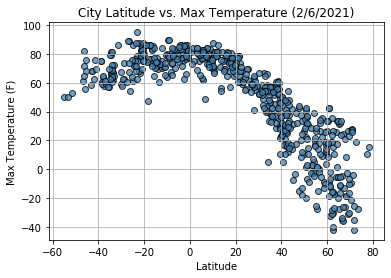

In [8]:
# Scatter Plot 1: Temperature
plt.scatter(lat, max_temp, facecolors='steelblue', alpha=0.75, edgecolors='black')
plt.title('City Latitude vs. Max Temperature (2/6/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid()

# Save the figure
plt.savefig('output_data/Fig1.png')

plt.show()

Analysis: This plot shows the correlation between latitude and temperature with the scatter plot visual. On both sides of Latitude 0°, it appears as the latitude gets smaller/larger, the temperature will get lower. This makes sense as 0° is earth's equator. Latitudes < 0° is the Southern Hemisphere and vice version the Northern. The correlation is very clear for the northern hemisphere cities because the norther it is the colder it is. For the data to the left of the 0° on the graph, the trend is not as clear mostly likely because we lack the data. Even though this is the gather from a sample of at least 500 cities, it is most definitely because most of the area on the southern hemisphere is covered by ocean, so there are not as many cities when we get closer to the South Pole as to the North Pole.

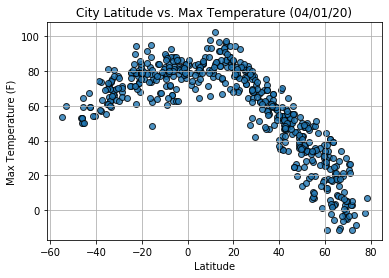

In [10]:
# Provided output, left for reference...

## Latitude vs. Humidity Plot

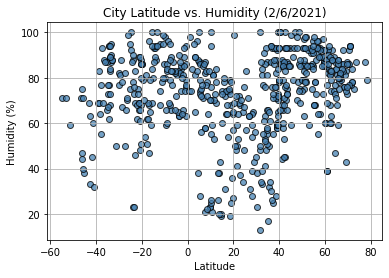

In [9]:
# Scatter Plot 2: Humidity
plt.scatter(lat, humidity, facecolors='steelblue', alpha=0.75, edgecolors='black')
plt.title('City Latitude vs. Humidity (2/6/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig('output_data/Fig2.png')

plt.show()

Analysis: This plot shows the correlation between latitude and humidity with the scatter plot visual, which looks to be close to 0. Latitude is likely not an influential factor that affects humidity level.

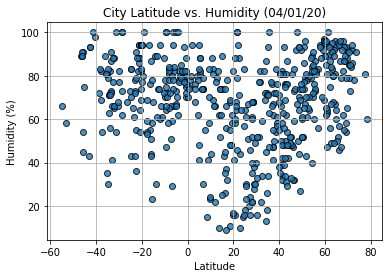

In [11]:
# Provided output, left for reference...

## Latitude vs. Cloudiness Plot

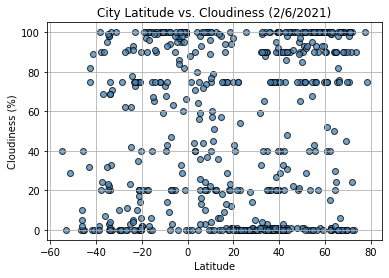

In [10]:
# Scatter Plot : Cloudiness
plt.scatter(lat, cloudiness, facecolors='steelblue', alpha=0.75, edgecolors='black')
plt.title('City Latitude vs. Cloudiness (2/6/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig('output_data/Fig3.png')

plt.show()

Analysis: This plot shows the correlation between latitude and cloudiness with the scatter plot visual, which looks to be close to 0. Latitude is likely not an influential factor that affects how cloudy a certain day is at a selected city.

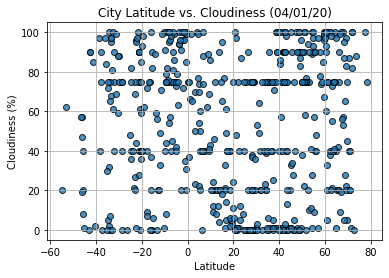

In [12]:
# Provided output, left for reference...

## Latitude vs. Wind Speed Plot

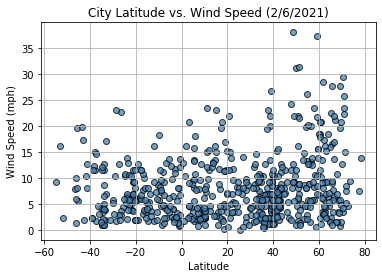

In [11]:
# Scatter Plot 4: Wind Speed
plt.scatter(lat, wind_speed, facecolors='steelblue', alpha=0.75, edgecolors='black')
plt.title('City Latitude vs. Wind Speed (2/6/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()

# Save the figure
plt.savefig('output_data/Fig4.png')

plt.show()

Analysis: This plot shows the correlation between latitude and wind speed with the scatter plot visual, which looks to be close to 0. Latitude is likely not an influential factor that affects how strong the wind is on a given day. In the graph above, there might just a very few potential outlier(s) on the top right (where the wind speed is ~40-50mph). Even though there's a minimal to none likelihood that higher latitude indicates the possibility of faster wind, there's not enough evidence to show that trend, at least from the sample we selected.

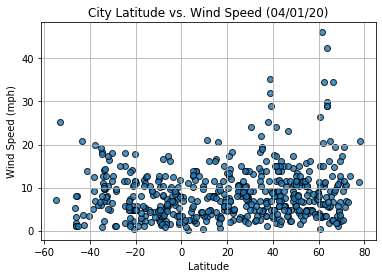

In [13]:
# Provided output, left for reference...

## Linear Regression

In [12]:
# Create new variables to hold data from the northern and southern hemispheres separately
lat_north = cities_geo_data.loc[cities_geo_data['Lat'] >= 0, 'Lat']
lat_south = cities_geo_data.loc[cities_geo_data['Lat'] < 0, 'Lat']
max_temp_north = cities_geo_data.loc[cities_geo_data['Lat'] >= 0, 'Max Temp']
max_temp_south = cities_geo_data.loc[cities_geo_data['Lat'] < 0, 'Max Temp']
humidity_north = cities_geo_data.loc[cities_geo_data['Lat'] >= 0, 'Humidity']
humidity_south = cities_geo_data.loc[cities_geo_data['Lat'] < 0, 'Humidity']
cloudiness_north = cities_geo_data.loc[cities_geo_data['Lat'] >= 0, 'Cloudiness']
cloudiness_south = cities_geo_data.loc[cities_geo_data['Lat'] < 0, 'Cloudiness']
wind_speed_north = cities_geo_data.loc[cities_geo_data['Lat'] >= 0, 'Wind Speed']
wind_speed_south = cities_geo_data.loc[cities_geo_data['Lat'] < 0, 'Wind Speed']

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.76


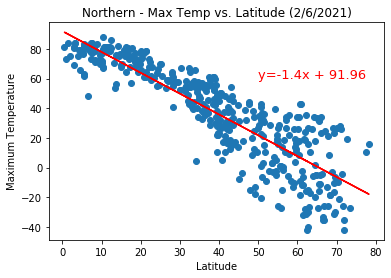

In [35]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north, max_temp_north)
regress_values = lat_north * slope + intercept
line_eq = f'y={round(slope,2)}x + {round(intercept,2)}'

plt.scatter(lat_north, max_temp_north)
plt.plot(lat_north, regress_values, 'r-')

plt.annotate(line_eq, (50, 60), fontsize=13, color='r')
plt.title('Northern - Max Temp vs. Latitude (2/6/2021)')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
print(f'The r-squared is: {round(rvalue**2, 2)}')

plt.show()

In [14]:
# Interpretation of the regression model...
print(f'''
        Based on the regression model,
        for each unit increase (+1) of latitude,
        the max temperature of a selected city is estiamted to change by {round(slope, 2)}.
        And when latitude is 0°, meaning at earth's equator,
        the max temperature of a selected city is estimated to be at {round(intercept, 2)} °F.
        
        Also, there is a moderate-strong negative correlation between
        latitude and temperature in the Northern Hemisphere.
        ''')


        Based on the regression model,
        for each unit increase (+1) of latitude,
        the max temperature of a selected city is estiamted to change by -1.4.
        And when latitude is 0°, meaning at earth's equator,
        the max temperature of a selected city is estimated to be at 91.96 °F.
        
        Also, there is a moderate-strong negative correlation between
        latitude and temperature in the Northern Hemisphere.
        


The r-value is: 0.46937863826630627


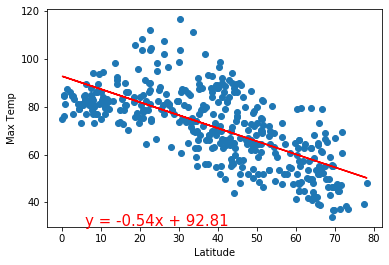

In [25]:
# Provided output, left for reference...

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.27


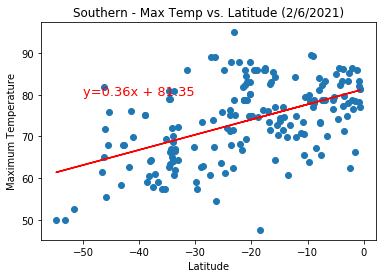

In [36]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south, max_temp_south)
regress_values = lat_south * slope + intercept
line_eq = f'y={round(slope,2)}x + {round(intercept,2)}'

plt.scatter(lat_south, max_temp_south)
plt.plot(lat_south, regress_values, 'r-')

plt.annotate(line_eq, (-50, 80), fontsize=13, color='r')
plt.title('Southern - Max Temp vs. Latitude (2/6/2021)')
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')
print(f'The r-squared is: {round(rvalue**2, 2)}')

plt.show()

In [16]:
# Interpretation of the regression model...
print(f'''
        Based on the regression model,
        for each unit increase (+1) of latitude,
        the max temperature of a selected city is estiamted to change by {round(slope, 2)}.
        And when latitude is 0°, meaning at earth's equator,
        the max temperature of a selected city is estimated to be at {round(intercept, 2)} °F.
        
        Also, there is a weak-moderate positive correlation between
        latitude and temperature in the Southern Hemisphere.
        ''')


        Based on the regression model,
        for each unit increase (+1) of latitude,
        the max temperature of a selected city is estiamted to change by 0.36.
        And when latitude is 0°, meaning at earth's equator,
        the max temperature of a selected city is estimated to be at 81.35 °F.
        
        Also, there is a weak-moderate positive correlation between
        latitude and temperature in the Southern Hemisphere.
        


The r-value is: 0.6082708688906918


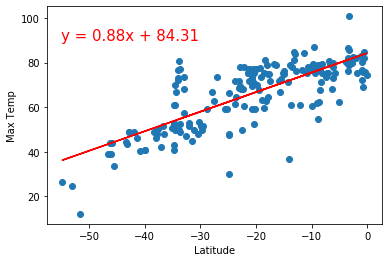

In [26]:
# Provided output, left for reference...

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12


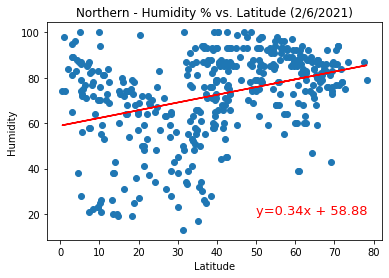

In [37]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north, humidity_north)
regress_values = lat_north * slope + intercept
line_eq = f'y={round(slope,2)}x + {round(intercept,2)}'

plt.scatter(lat_north, humidity_north)
plt.plot(lat_north, regress_values, 'r-')

plt.annotate(line_eq, (50, 20), fontsize=13, color='r')
plt.title('Northern - Humidity % vs. Latitude (2/6/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r-squared is: {round(rvalue**2, 2)}')

plt.show()

In [18]:
# Interpretation of the regression model...
print(f'''
        Based on the regression model,
        for each unit increase (+1) of latitude,
        the humidity level of a selected city is estiamted to change by {round(slope, 2)}%.
        And when latitude is 0°, meaning at earth's equator,
        the humidity level of a selected city is estimated to be at {round(intercept, 2)}%.
        
        Also, there is minimal to no correlation between
        latitude and humidity level in the Northern Hemisphere.
        ''')


        Based on the regression model,
        for each unit increase (+1) of latitude,
        the humidity level of a selected city is estiamted to change by 0.34%.
        And when latitude is 0°, meaning at earth's equator,
        the humidity level of a selected city is estimated to be at 58.88%.
        
        Also, there is minimal to no correlation between
        latitude and humidity level in the Northern Hemisphere.
        


The r-value is: 0.000543987878808455


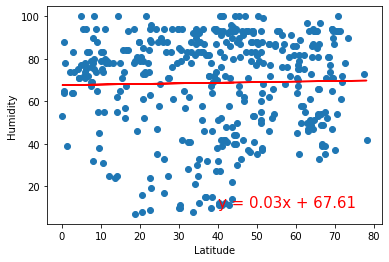

In [27]:
# Provided output, left for reference...

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.07


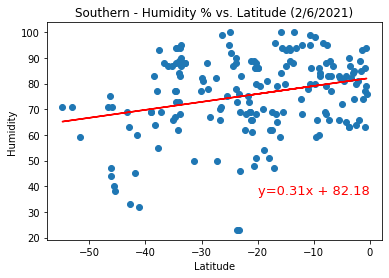

In [38]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south, humidity_south)
regress_values = lat_south * slope + intercept
line_eq = f'y={round(slope,2)}x + {round(intercept,2)}'

plt.scatter(lat_south, humidity_south)
plt.plot(lat_south, regress_values, 'r-')

plt.annotate(line_eq, (-20, 37), fontsize=13, color='r')
plt.title('Southern - Humidity % vs. Latitude (2/6/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f'The r-squared is: {round(rvalue**2, 2)}')

plt.show()

In [22]:
# Interpretation of the regression model...
print(f'''
        Based on the regression model,
        for each unit increase (+1) of latitude,
        the humidity level of a selected city is estiamted to change by {round(slope, 2)}%.
        And when latitude is 0°, meaning at earth's equator,
        the humidity level of a selected city is estimated to be at {round(intercept, 2)}%.
        
        Also, there is minimal to no correlation between
        latitude and humidity level in the Southern Hemisphere.
        ''')


        Based on the regression model,
        for each unit increase (+1) of latitude,
        the humidity level of a selected city is estiamted to change by 0.31%.
        And when latitude is 0°, meaning at earth's equator,
        the humidity level of a selected city is estimated to be at 82.18%.
        
        Also, there is minimal to no correlation between
        latitude and humidity level in the Southern Hemisphere.
        


The r-value is: 0.014985174297345524


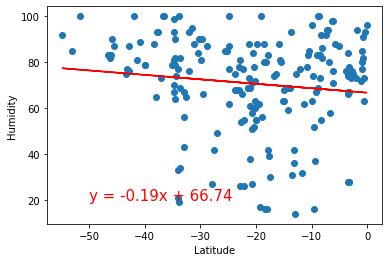

In [28]:
# Provided output, left for reference...

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06


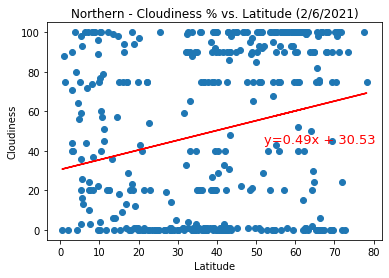

In [40]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north, cloudiness_north)
regress_values = lat_north * slope + intercept
line_eq = f'y={round(slope,2)}x + {round(intercept,2)}'

plt.scatter(lat_north, cloudiness_north)
plt.plot(lat_north, regress_values, 'r-')

plt.annotate(line_eq, (52, 44), fontsize=13, color='r')
plt.title('Northern - Cloudiness % vs. Latitude (2/6/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r-squared is: {round(rvalue**2, 2)}')

plt.show()

In [28]:
# Interpretation of the regression model...
print(f'''
        Based on the regression model,
        for each unit increase (+1) of latitude,
        the cloudiness level of a selected city is estiamted to change by {round(slope, 2)}%.
        And when latitude is 0°, meaning at earth's equator,
        the cloudiness level of a selected city is estimated to be at {round(intercept, 2)}%.
        
        Also, there is minimal to no correlation between
        latitude and cloudiness level in the Northern Hemisphere.
        ''')


        Based on the regression model,
        for each unit increase (+1) of latitude,
        the cloudiness level of a selected city is estiamted to change by 0.49%.
        And when latitude is 0°, meaning at earth's equator,
        the cloudiness level of a selected city is estimated to be at 30.53%.
        
        Also, there is minimal to no correlation between
        latitude and cloudiness level in the Northern Hemisphere.
        


The r-value is: 0.0020898727664228514


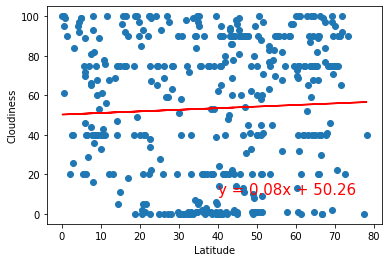

In [29]:
# Provided output, left for reference...

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.14


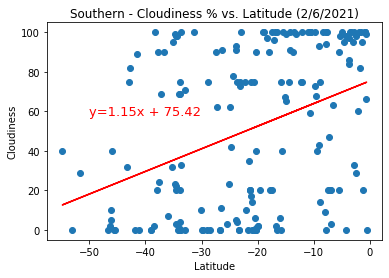

In [41]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south, cloudiness_south)
regress_values = lat_south * slope + intercept
line_eq = f'y={round(slope,2)}x + {round(intercept,2)}'

plt.scatter(lat_south, cloudiness_south)
plt.plot(lat_south, regress_values, 'r-')

plt.annotate(line_eq, (-50,58), fontsize=13, color='r')
plt.title('Southern - Cloudiness % vs. Latitude (2/6/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f'The r-squared is: {round(rvalue**2, 2)}')

plt.show()

In [30]:
# Interpretation of the regression model...
print(f'''
        Based on the regression model,
        for each unit increase (+1) of latitude,
        the cloudiness level of a selected city is estiamted to change by {round(slope, 2)}%.
        And when latitude is 0°, meaning at earth's equator,
        the cloudiness level of a selected city is estimated to be at {round(intercept, 2)}%.
        
        Also, there is minimal to no correlation between
        latitude and cloudiness level in the Southern Hemisphere.
        ''')


        Based on the regression model,
        for each unit increase (+1) of latitude,
        the cloudiness level of a selected city is estiamted to change by 1.15%.
        And when latitude is 0°, meaning at earth's equator,
        the cloudiness level of a selected city is estimated to be at 75.42%.
        
        Also, there is minimal to no correlation between
        latitude and cloudiness level in the Southern Hemisphere.
        


The r-value is: 0.0035263772085582894


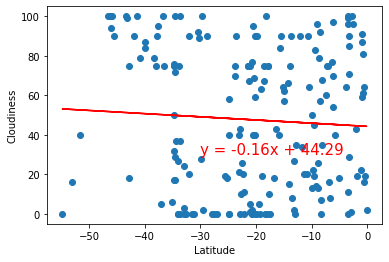

In [30]:
# Provided output, left for reference...

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03


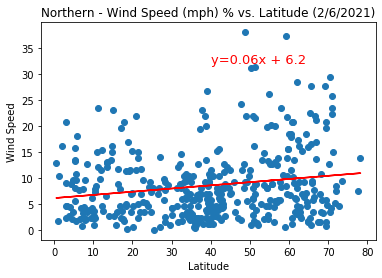

In [43]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_north, wind_speed_north)
regress_values = lat_north * slope + intercept
line_eq = f'y={round(slope,2)}x + {round(intercept,2)}'

plt.scatter(lat_north, wind_speed_north)
plt.plot(lat_north, regress_values, 'r-')

plt.annotate(line_eq, (40, 32), fontsize=13, color='r')
plt.title('Northern - Wind Speed (mph) % vs. Latitude (2/6/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'The r-squared is: {round(rvalue**2, 2)}')

plt.show()

In [32]:
# Interpretation of the regression model...
print(f'''
        Based on the regression model,
        for each unit increase (+1) of latitude,
        the wind speed of a selected city is estiamted to change by {round(slope, 2)} mph.
        And when latitude is 0°, meaning at earth's equator,
        the wind speed of a selected city is estimated to be at {round(intercept, 2)} mph.
        
        Also, there is minimal to no correlation between
        latitude and wind speed in the Northern Hemisphere.
        ''')


        Based on the regression model,
        for each unit increase (+1) of latitude,
        the wind speed of a selected city is estiamted to change by 0.06 mph.
        And when latitude is 0°, meaning at earth's equator,
        the wind speed of a selected city is estimated to be at 6.2 mph.
        
        Also, there is minimal to no correlation between
        latitude and wind speed in the Northern Hemisphere.
        


The r-value is: 0.04019723576144484


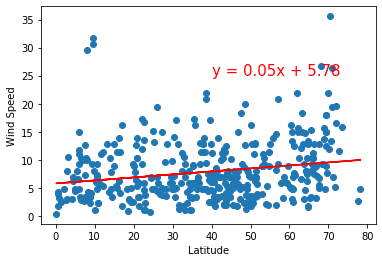

In [31]:
# Provided output, left for reference...

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.03


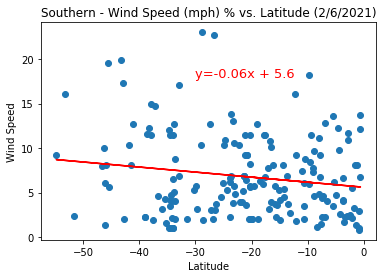

In [44]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_south, wind_speed_south)
regress_values = lat_south * slope + intercept
line_eq = f'y={round(slope,2)}x + {round(intercept,2)}'

plt.scatter(lat_south, wind_speed_south)
plt.plot(lat_south, regress_values, 'r-')

plt.annotate(line_eq, (-30, 18), fontsize=13, color='r')
plt.title('Southern - Wind Speed (mph) % vs. Latitude (2/6/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f'The r-squared is: {round(rvalue**2, 2)}')

plt.show()

In [34]:
# Interpretation of the regression model...
print(f'''
        Based on the regression model,
        for each unit increase (+1) of latitude,
        the wind speed of a selected city is estiamted to change by {round(slope, 2)} mph.
        And when latitude is 0°, meaning at earth's equator,
        the wind speed of a selected city is estimated to be at {round(intercept, 2)} mph.
        
        Also, there is minimal to no correlation between
        latitude and wind speed in the Southern Hemisphere.
        ''')


        Based on the regression model,
        for each unit increase (+1) of latitude,
        the wind speed of a selected city is estiamted to change by -0.06 mph.
        And when latitude is 0°, meaning at earth's equator,
        the wind speed of a selected city is estimated to be at 5.6 mph.
        
        Also, there is minimal to no correlation between
        latitude and wind speed in the Southern Hemisphere.
        


The r-value is: 0.017128274759839232


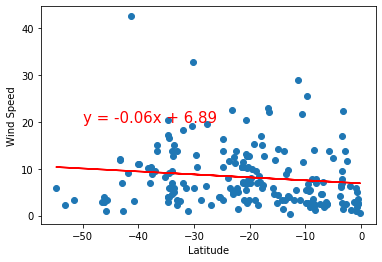

In [32]:
# Provided output, left for reference...